# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)

In [2]:
# Extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from statsmodels.genmod.generalized_linear_model import GLM

## Reading CSV

In [3]:
raw_ILDS = read_csv("train_features_ILDS.csv", delimiter=',')
train_labels = read_csv("train_labels_ILDS.csv", delimiter=',')

raw_ILDS.shape #tamany

(462, 10)

Editing dataframe

- Bilirubin (TB & DB): product of the degradation of hemoglobin. It should be processed by the liver and make it water-soluble to be expelled from the body. Direct Bilirubin is the Bilirubin processed by the liver, the Indirect one is the Bilirubin unprocessed, and the total is the sum of the two.
- Alkaline Phosphotase (Alkphos): enzime that breaks down phosphate groups. It is everywhere, but more concentrated in the liver and bones. Liver damages can lead to an increased release of these enzimes.
- Alamine Aminotransferase (Sgpt): enzime that participates in the metabolism of amino acids. Damages in the liver can lead to an increase of these enzimes.
- Aspartate Aminotransferase (Sgot): enzime that participates in the metabolism of amino acids (just like Sgpt). Liver, heart or Muscle injuries can lead to an increase of concentration of these enzimes.
- Total proteins (TP): total of proteins in blood. Problems in liver or kidneys may lead to a decrease of this concentration.
- Albumin (ALB): keeps fluids inside blood vessels and transports substances. Problems in the liver may decrease its concentration, as this proteins is exclusively procused by the Liver.
- Albumin to Globulin (A/R): low ratio may indicate liver problems

In [4]:
raw_ILDS.columns = ['Age', 'Female', 'TB', 'DB', 'Alkphos', 'Sgpt', 
                'Sgot', 'TP', 'ALB', 'AR']
raw_ILDS.head()

,Age,Female,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AR
0,48,0,4.5,2.3,282,13,74,7.0,2.4,0.52
1,39,0,1.9,0.9,180,42,62,7.4,4.3,1.38
2,23,0,1.0,0.3,212,41,80,6.2,3.1,1.00
3,42,1,0.7,0.2,152,35,81,6.2,3.2,1.06
4,52,1,0.6,0.1,194,10,12,6.9,3.3,0.90


In [5]:
raw_ILDS.describe()

,Age,Female,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AR
count,462.000,462.000,462.000,462.000,462.000,462.000,462.000,462.000,462.000,462.000
mean,44.892,0.242,3.277,1.445,279.714,73.952,94.571,6.421,3.108,0.942
std,16.325,0.429,6.121,2.678,211.487,164.499,202.027,1.053,0.793,0.318
min,4.000,0.000,0.400,0.100,75.000,10.000,11.000,2.700,0.900,0.300
25%,33.000,0.000,0.800,0.200,176.000,23.000,25.000,5.700,2.500,0.700
50%,45.000,0.000,1.000,0.300,208.000,34.000,41.000,6.500,3.100,0.910
75%,57.750,0.000,2.675,1.275,290.000,59.750,82.750,7.100,3.700,1.100
max,90.000,1.000,75.000,18.300,1630.000,2000.000,2946.000,9.500,5.500,2.800


In [6]:
raw_ILDS['Female'].value_counts() 

Female
0    350
1    112
Name: count, dtype: int64

In [7]:
train_labels[raw_ILDS['Female'] == 1].value_counts()

0
0    74
1    38
Name: count, dtype: int64

In [27]:
train_labels[raw_ILDS['Female'] == 0].value_counts()

0
0    256
1     94
Name: count, dtype: int64

TODO: hi ha més homes que dones, podria anar bé una mica de resampling.
TODO2: També ocorreix que hi ha més persones sanes que malaltes; això potser és més greu. Podríem provar de fer resampling de les dues.

## Dealing with missing values

In [8]:
(raw_ILDS.Age == 90).value_counts()

Age
False    461
True       1
Name: count, dtype: int64

### Age

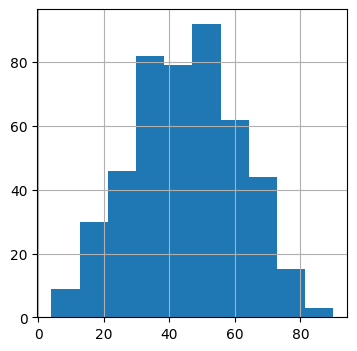

In [9]:
raw_ILDS.Age.hist(figsize=(4,4));

### Total Bilirubin

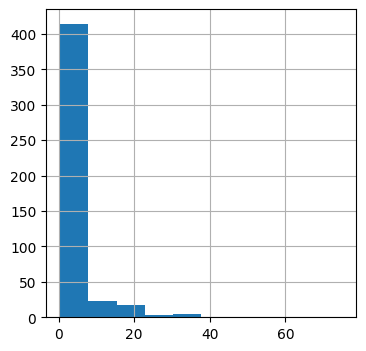

In [10]:
raw_ILDS.TB.hist(figsize=(4,4));

In [11]:
(raw_ILDS.TB==75).value_counts() # TODO: potser no és un missing value, i realment algú el tenia tan alt?

TB
False    461
True       1
Name: count, dtype: int64

Seems like 75 is a _missing_ value, lets delete it

In [12]:
ILDS = raw_ILDS[raw_ILDS.TB!=75]

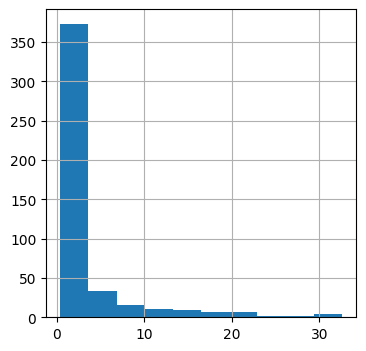

In [13]:
ILDS.TB.hist(figsize=(4,4)); 

### Direct Bilirubin

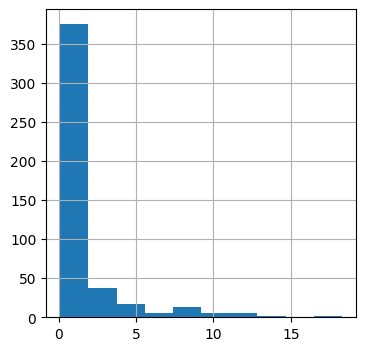

In [14]:
raw_ILDS.DB.hist(figsize=(4,4));

### Alkaline Phosphotase

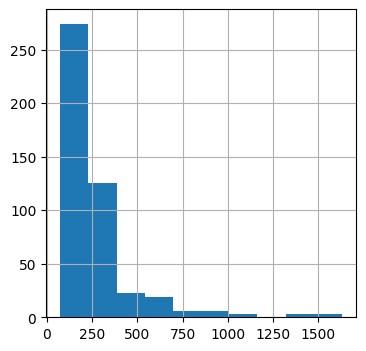

In [15]:
raw_ILDS.Alkphos.hist(figsize=(4,4));

### Alamine Aminotransferase

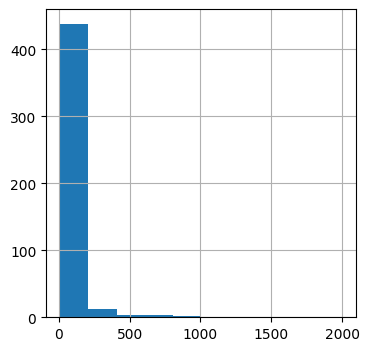

In [16]:
raw_ILDS.Sgpt.hist(figsize=(4,4));

Sgpt==2000 may be a missing value

In [17]:
(raw_ILDS.Sgpt==2000).value_counts()

Sgpt
False    461
True       1
Name: count, dtype: int64

In [18]:
ILDS = ILDS[ILDS.Sgpt != 2000]

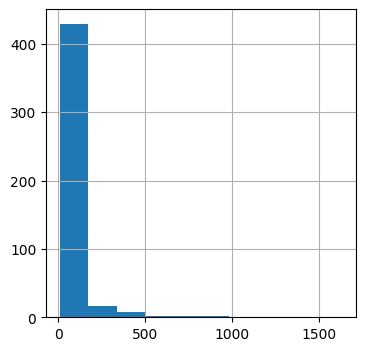

In [19]:
ILDS.Sgpt.hist(figsize=(4,4));

### Aspartate Aminotransferase

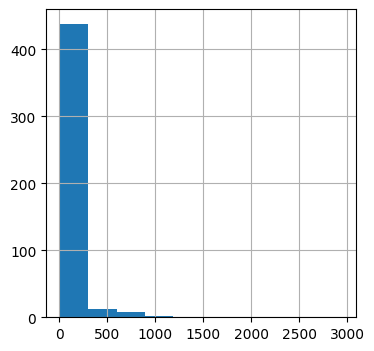

In [20]:
raw_ILDS.Sgot.hist(figsize=(4,4));

In [21]:
(raw_ILDS.Sgot==2946).value_counts() # TODO: potser no és un missing value is eliminar només aquest valor no fa absolutament res?

Sgot
False    461
True       1
Name: count, dtype: int64

In [22]:
ILDS = ILDS[ILDS.Sgot != 2946]

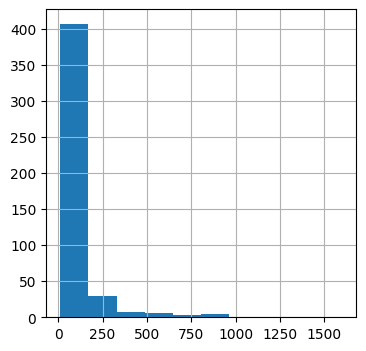

In [23]:
ILDS.Sgot.hist(figsize=(4,4));

### Total Protiens

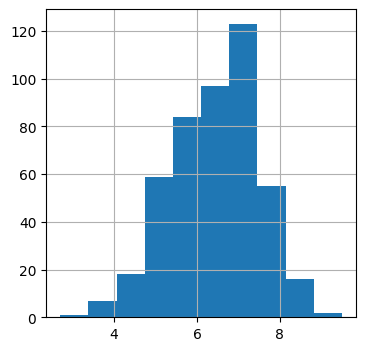

In [24]:
raw_ILDS.TP.hist(figsize=(4,4));

### Albumin

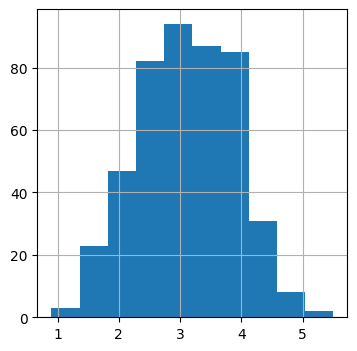

In [25]:
raw_ILDS.ALB.hist(figsize=(4,4));

### Albumin and Globulin Ratio

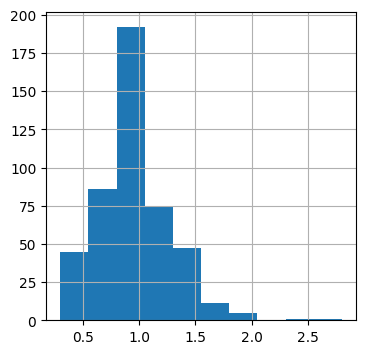

In [26]:
raw_ILDS.AR.hist(figsize=(4,4));